# Introduction to the Hurst exponent -  with code in Python


$x_t = log(S_t)$

$Var(\tau) = \langle|x_{t+\tau} - x_{t}|^2\rangle$

$Var(\tau) \sim \tau$

$Var(\tau) \sim \tau^{2H}$

## Setup

In [ ]:
#%config InlineBackend.figure_format = 'retina'
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 6.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

## Preparing the data

In [ ]:
spy_df = yf.download("^GSPC", 
                     start="2010-01-01", 
                     end="2019-12-31", 
                     progress=False)
spy_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


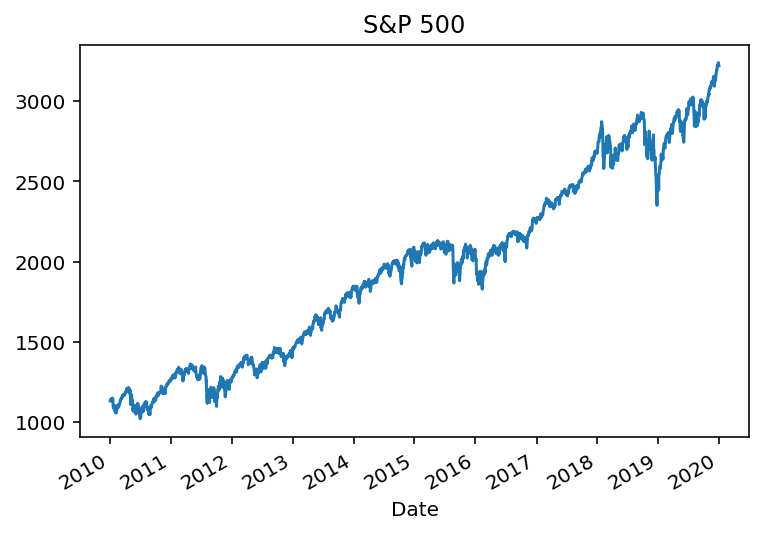

In [ ]:
spy_df["Adj Close"].plot(title="S&P 500");

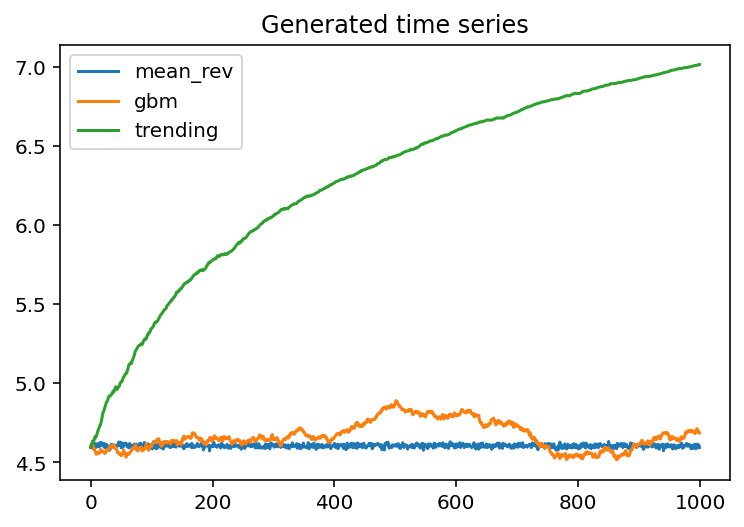

In [ ]:
sample_size = 1000
scalar = 100

np.random.seed(123)
df = pd.DataFrame(data={"mean_rev": np.log(np.random.randn(sample_size) + scalar),
                        "gbm": np.log(np.cumsum(np.random.randn(sample_size)) + scalar),
                        "trending": np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar)})

df.plot(title="Generated time series");

## Calculating the Hurst Exponent

In [ ]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]


In [ ]:
for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(spy_df["Adj Close"].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.4394
Hurst exponent with 100 lags: 0.3834
Hurst exponent with 300 lags: 0.3257
Hurst exponent with 500 lags: 0.3230
Hurst exponent with 1000 lags: 0.1793


In [ ]:
for lag in [20, 100, 300, 500]:
    print(f"Hurst exponents with {lag} lags ----")
    for column in df.columns:
        print(f"{column}: {get_hurst_exponent(df[column].values, lag):.4f}")

Hurst exponents with 20 lags ----
mean_rev: 0.0064
gbm: 0.4539
trending: 0.8715
Hurst exponents with 100 lags ----
mean_rev: -0.0021
gbm: 0.5401
trending: 0.8442
Hurst exponents with 300 lags ----
mean_rev: 0.0002
gbm: 0.5691
trending: 0.7463
Hurst exponents with 500 lags ----
mean_rev: 0.0015
gbm: 0.4854
trending: 0.6662
